# Enunciado
Implementar y analizar el comportamiento del enfriamiento simulado para alcanzar
la solución óptima del problema que se describe a continuación:

Obtener el mínimo global de la siguiente función:

$$
f(x) = \dfrac{cos(x)}{x}, x \in [0,30]
$$

Mostrar gráficamente la evolución de los valores de $x$ y $f$ considerados a lo largo de
las iteraciones de la metaheurística.



##### La siguiente celda muestra los imports necesarios para poder ejecutar el agoritmo

In [72]:
import funciones as fn
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt
import graficos as gf
import termometro as trm

print("Se han cargado todas las librerias necesaias")

Se han cargado todas las librerias necesaias


### Seleccionar las características del algoritmo

#### Seleccionar la función a optimizar, definir el intervalo.

In [73]:
INTERVALO = (0,30)
FUNCION  = fn.funcion_enunciado

### Funciones del algoritmo

Obtener un vecino a una solución

In [74]:
def vecindad(x, movimiento=1):
    vecindad = (INTERVALO[1] - INTERVALO[0]) * movimiento / 10
    delta = (-vecindad/2.) + vecindad * rnd.random_sample()
    return fn.ajustar_valor(delta+x, INTERVALO)

Probabilidad con la que se va a aceptar una solución

In [75]:
def probabilidad_aceptacion(y, y_nuevo, temperatura):
    # si mejora la solución actual se acepta siempre
    if y_nuevo < y:
        return 1
    # en caso contrario, la aceptación dependerá de la temperatura,
    # a medida que avanza el problema menor temperatura, menor probabilidad de aceptación
    else:
        probabilidad = np.exp(- (y_nuevo - y) / temperatura)
        return probabilidad

Variación de la temperatura a medida que avanza el algoritmo

In [76]:
def get_temperatura(estado = -1, iteracion = -1, descanso = 0, temperatura_actual = -1, alpha = 0, temperatura_inicial = 0, constante = 0, temperatura_final = -1, n_entornos = -1, beta = -1):
    if estado != -1:
        return trm.temperatura_adicional(estado)
    elif constante != 0:
        return trm.temperatura_hajek(iteracion, constante)
    elif beta != -1:
        return trm.temperatura_lundy(temperatura_actual, beta)
    else:
        return trm.temperatura_kirkpatrick(iteracion, descanso, temperatura_actual, alpha, temperatura_inicial)

### Algoritmo

Algoritmo en pseudocódigo aquí

In [77]:
def recocido_simulado(funcion,
                      vecindad,
                      x_inicial,
                      probabilidad_aceptacion,
                      temperatura,
                      max_iteraciones=1000,
                      informacion=1):
    x = x_inicial
    y = funcion(x)
    valores_x, valores_y = [x], [y]
    valores_t = []
    for iteracion in range(max_iteraciones):
        estado = iteracion / float(max_iteraciones)
        #Es necesario pasar los parámetros necesarios para el algoritmo elegido,
        T = get_temperatura(estado)
        valores_t.append(T)
        x_vecina = vecindad(x, estado)
        y_vecina = funcion(x_vecina)
        if informacion >= 1:
            print("Tteracion #{:>2}/{:>2} : T = {:>4.3g}, x = {:>4.3g}, y = {:>4.3g}, x_vecina = {:>4.3g}, y_vecina = {:>4.3g}".format(iteracion, max_iteraciones, T, x, y, x_vecina, y_vecina))
        if probabilidad_aceptacion(y, y_vecina, T) > rnd.random():
            x,y = x_vecina, y_vecina
            valores_x.append(x)
            valores_y.append(y)
    return x, funcion(x), valores_x, valores_y, valores_t

### Ejecución del algoritmo

In [78]:
x, y, valores_x, valores_y, valores_t = recocido_simulado(FUNCION, vecindad, 10, probabilidad_aceptacion, temperatura,informacion=2)

Tteracion # 0/1000 : T =    1, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0839
Tteracion # 1/1000 : T = 0.999, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0839
Tteracion # 2/1000 : T = 0.998, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.084
Tteracion # 3/1000 : T = 0.997, x =   10, y = -0.084, x_vecina =   10, y_vecina = -0.0839
Tteracion # 4/1000 : T = 0.996, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.0842
Tteracion # 5/1000 : T = 0.995, x =   10, y = -0.0842, x_vecina = 9.99, y_vecina = -0.0845
Tteracion # 6/1000 : T = 0.994, x = 9.99, y = -0.0845, x_vecina =   10, y_vecina = -0.0839
Tteracion # 7/1000 : T = 0.993, x =   10, y = -0.0839, x_vecina =   10, y_vecina = -0.084
Tteracion # 8/1000 : T = 0.992, x =   10, y = -0.084, x_vecina = 9.99, y_vecina = -0.0845
Tteracion # 9/1000 : T = 0.991, x = 9.99, y = -0.0845, x_vecina =   10, y_vecina = -0.0837
Tteracion #10/1000 : T = 0.99, x =   10, y = -0.0837, x_vecina =   10, y_vecina = -0.0835
Ttera

### Visualización de los resultados del algoritmo

C:\Uni\Master\Busqueda inteligente basada en metaheurísticas\SA\MinFun-SA\funciones.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  def funcion_enunciado(x):


ZeroDivisionError: float division by zero

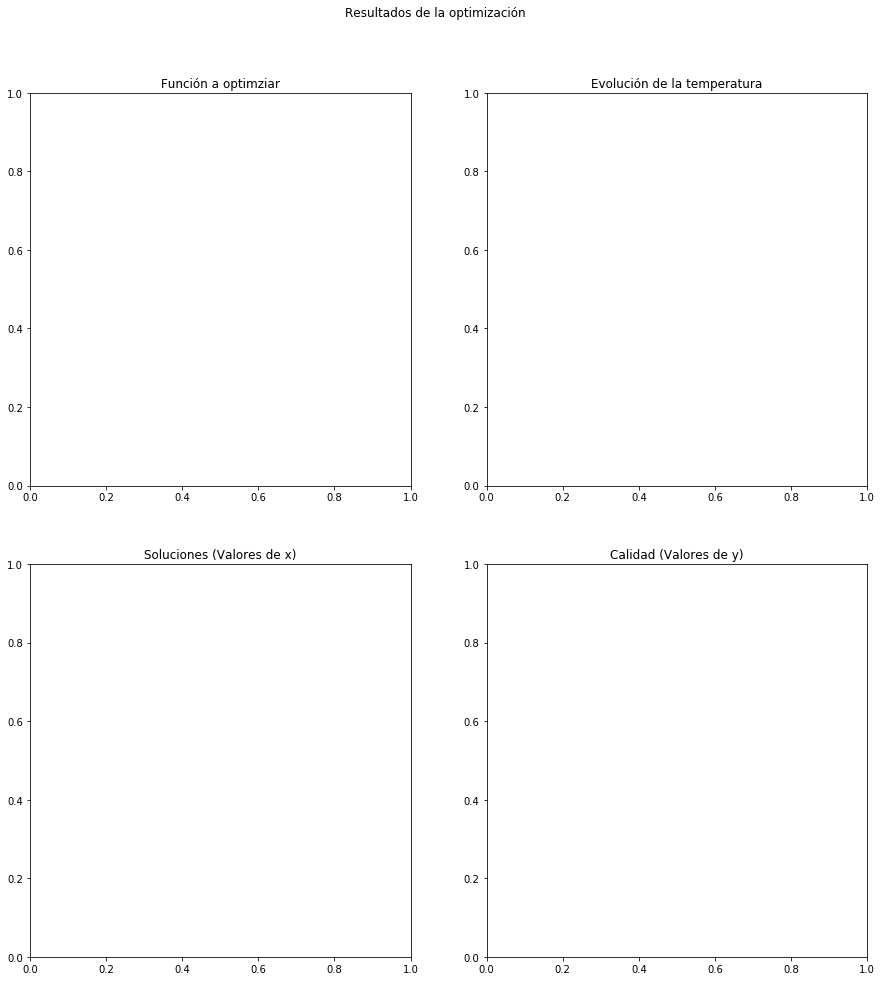

In [79]:
gf.plot_results(FUNCION, INTERVALO, valores_x, valores_y, valores_t)
print(FUNCION)